<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/eii_u2_04_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/PaulinaAragon/ESTADISTICA/refs/heads/main/smart_logistics_dataset.csv')
df.dropna(inplace = True)
df

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [48]:
df.drop(columns = ["Timestamp"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


In [49]:
df['Asset_ID'].unique()

array(['Truck_6', 'Truck_9', 'Truck_2', 'Truck_10', 'Truck_8', 'Truck_3',
       'Truck_5', 'Truck_4', 'Truck_1', 'Truck_7'], dtype=object)

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Asset_ID)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,1185.003921,131.667102,0.635796,0.766885
Residual,727.0,150554.551031,207.090166,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 Truck_1 Truck_10  -3.2128 0.9518 -11.0087   4.583  False
 Truck_1  Truck_2  -1.3116    1.0  -9.1835  6.5602  False
 Truck_1  Truck_3    1.212    1.0  -6.7138  9.1377  False
 Truck_1  Truck_4  -0.8988    1.0  -8.4764  6.6788  False
 Truck_1  Truck_5  -0.9696    1.0  -8.7655  6.8263  False
 Truck_1  Truck_6   0.6318    1.0  -7.1887  8.4524  False
 Truck_1  Truck_7   1.0687    1.0  -6.8032  8.9405  False
 Truck_1  Truck_8  -1.3324 0.9999  -8.7337  6.0688  False
 Truck_1  Truck_9  -0.0337    1.0  -8.1391  8.0716  False
Truck_10  Truck_2   1.9012 0.9986  -5.6858  9.4882  False
Truck_10  Truck_3   4.4248 0.7111  -3.2181 12.0677  False
Truck_10  Truck_4    2.314 0.9917  -4.9672  9.5952  False
Truck_10  Truck_5   2.2432 0.9948  -5.2648  9.7513  False
Truck_10  Truck_6   3.8447 0.8385  -3.6891 11.3784  False
Truck_10  Truc

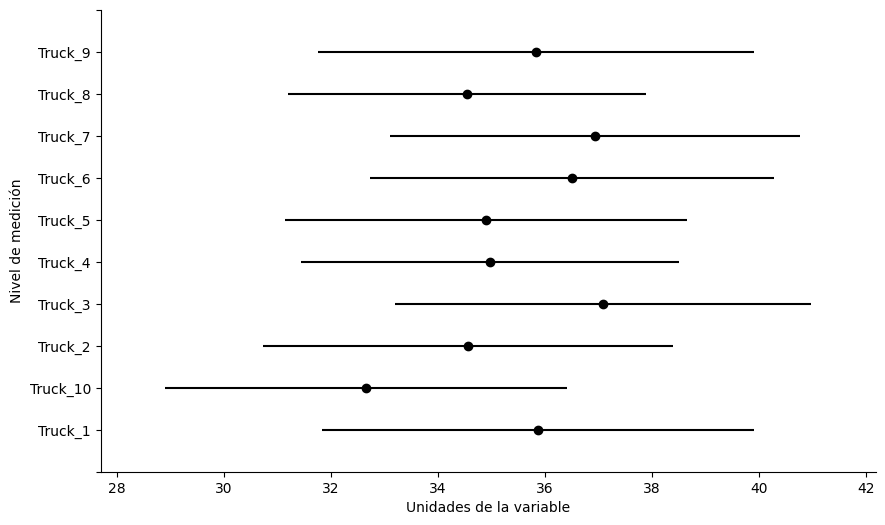

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Asset_ID'], alpha = nivel_significancia)

tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel='Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [68]:
df.drop(columns = ["Asset_ID"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


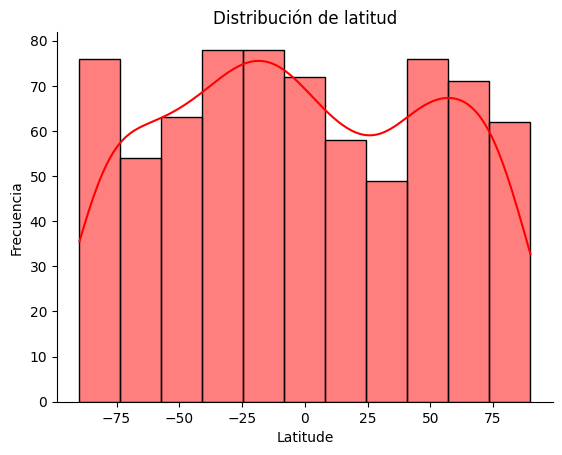

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Frecuencia')
plt.title('Distribución de latitud')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

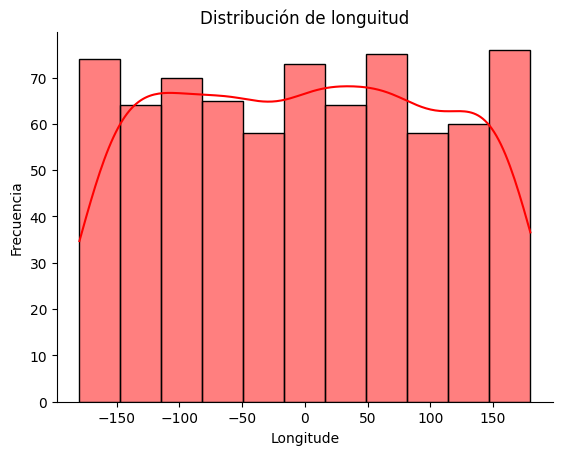

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'red')

plt.xlabel('Longitude')
plt.ylabel('Frecuencia')
plt.title('Distribución de longuitud')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

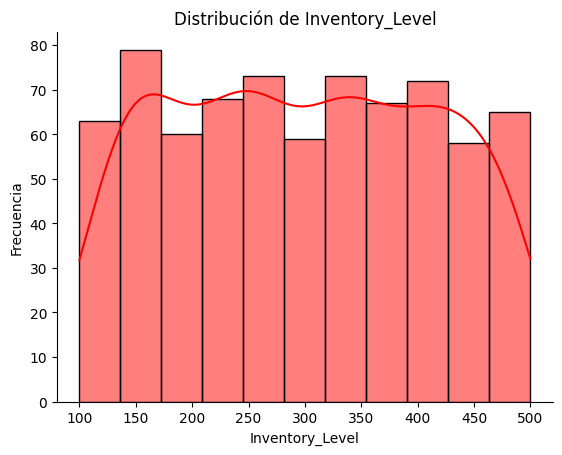

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'red')

plt.xlabel('Inventory_Level')
plt.ylabel('Frecuencia')
plt.title('Distribución de Inventory_Level')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

In [70]:
df['Shipment_Status'].unique()

array(['In Transit', 'Delivered', 'Delayed'], dtype=object)

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Logistics_Delay ~ C(Shipment_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,73.573170,36.786585,251.839492,5.288248e-84
Residual,734.0,107.216518,0.146072,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
  Delayed  Delivered   1.2094 0.6067 -1.7702 4.1891  False
  Delayed In Transit   0.9661 0.7424 -2.1183 4.0505  False
Delivered In Transit  -0.2433 0.9813 -3.3305 2.8439  False
----------------------------------------------------------


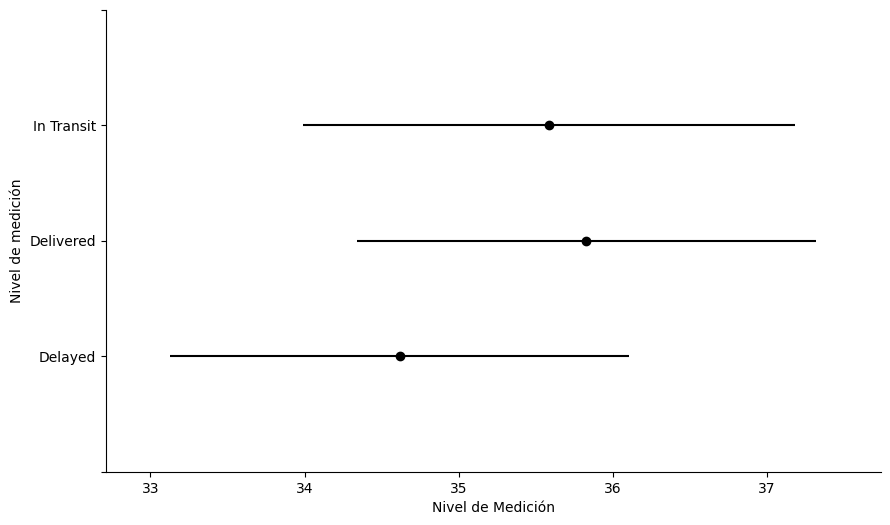

In [72]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Shipment_Status'], alpha = nivel_significancia)

tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel='Nivel de Medición')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [73]:
df.drop(columns = ["Shipment_Status"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


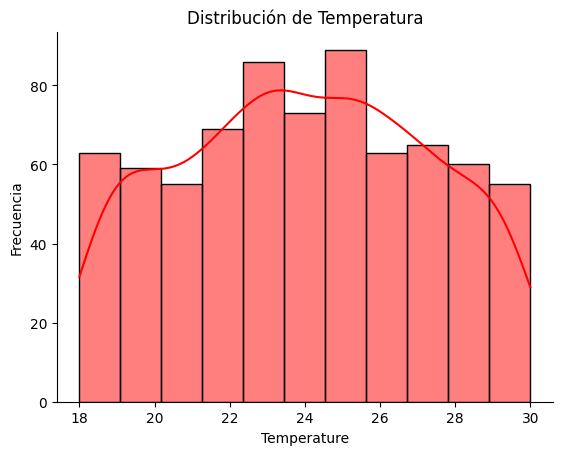

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Temperature'], kde = True, color = 'red')

plt.xlabel('Temperature')
plt.ylabel('Frecuencia')
plt.title('Distribución de Temperatura')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

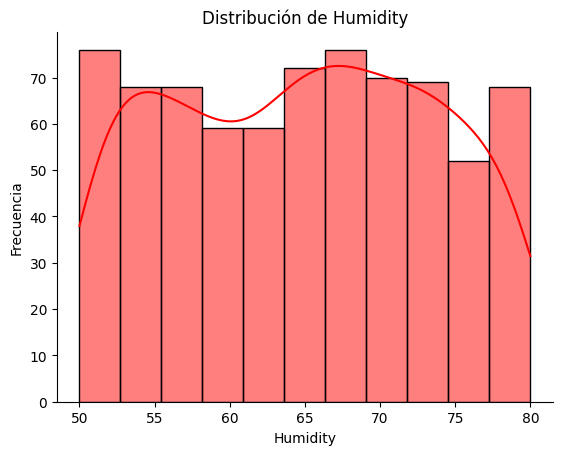

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Humidity'], kde = True, color = 'red')

plt.xlabel('Humidity')
plt.ylabel('Frecuencia')
plt.title('Distribución de Humidity')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

In [74]:
df['Traffic_Status'].unique()

array(['Heavy', 'Detour', 'Clear'], dtype=object)

In [77]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Traffic_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,168.452231,84.226116,0.407874,0.665213
Residual,734.0,151571.102721,206.500140,NaN,NaN


In [78]:
df.drop(columns = ["Traffic_Status"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,Weather,83.7,272,0


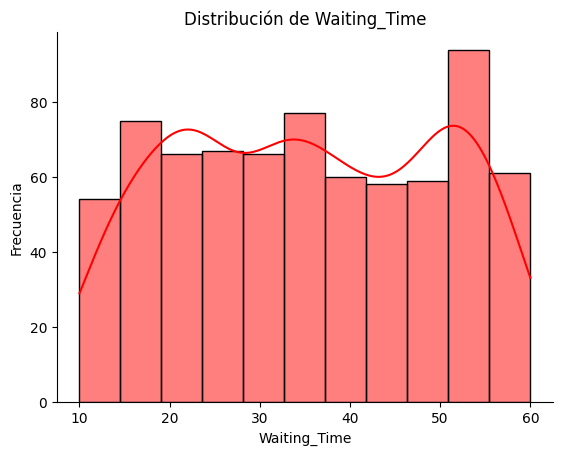

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'red')

plt.xlabel('Waiting_Time')
plt.ylabel('Frecuencia')
plt.title('Distribución de Waiting_Time')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

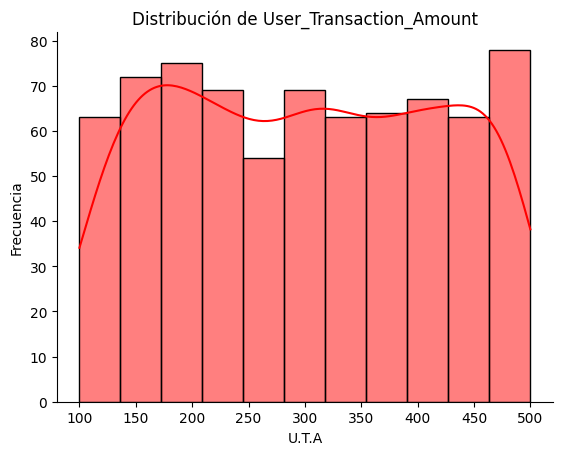

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'red')

plt.xlabel('U.T.A')
plt.ylabel('Frecuencia')
plt.title('Distribución de User_Transaction_Amount')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

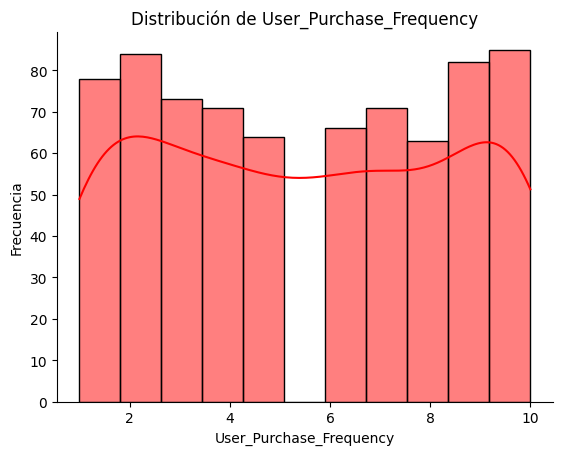

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Purchase_Frequency'], kde = True, color = 'red')

plt.xlabel('User_Purchase_Frequency')
plt.ylabel('Frecuencia')
plt.title('Distribución de User_Purchase_Frequency')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

In [85]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Logistics_Delay_Reason)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,430.598291,215.299145,1.044417,0.352419
Residual,734.0,151308.956662,206.142993,NaN,NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
      group1        group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Mechanical Failure Traffic  -0.0205 0.9999 -3.1312 3.0902  False
Mechanical Failure Weather  -1.6005 0.4272 -4.6199  1.419  False
           Traffic Weather    -1.58 0.4348 -4.5926 1.4327  False
----------------------------------------------------------------


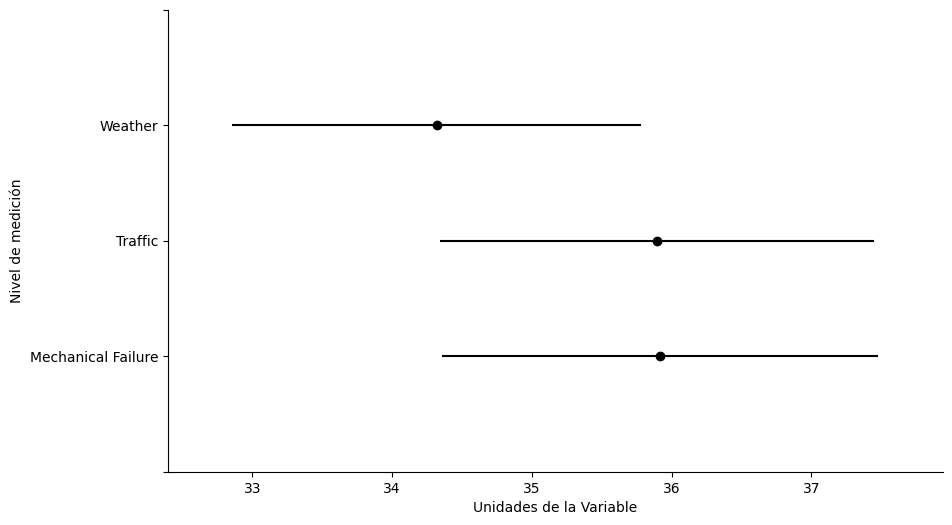

In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Logistics_Delay_Reason'], alpha = nivel_significancia)

tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel='Unidades de la Variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [87]:
df.drop(columns = ["Logistics_Delay_Reason"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272,0


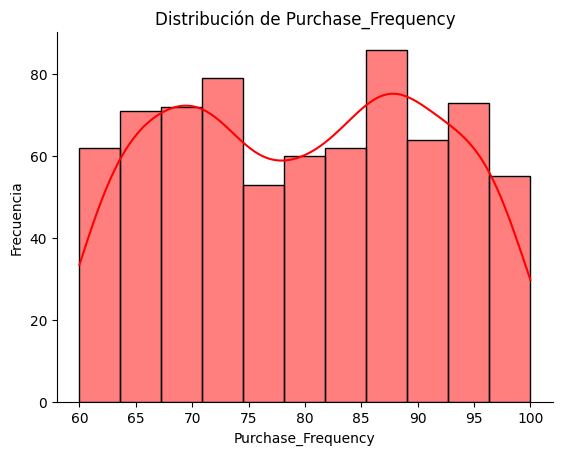

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'red')

plt.xlabel('Purchase_Frequency')
plt.ylabel('Frecuencia')
plt.title('Distribución de Purchase_Frequency')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

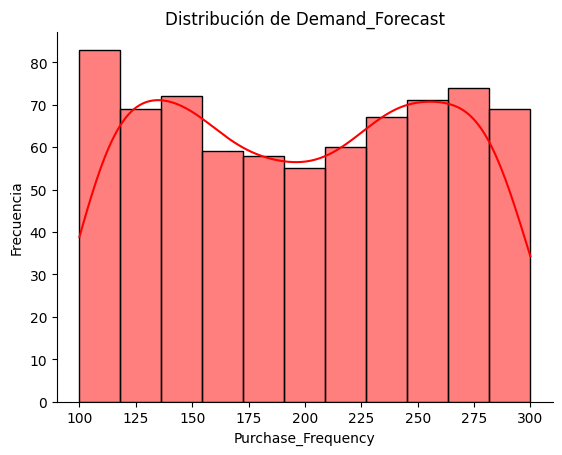

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand_Forecast'], kde = True, color = 'red')

plt.xlabel('Purchase_Frequency')
plt.ylabel('Frecuencia')
plt.title('Distribución de Demand_Forecast')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

In [90]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time ~ C(Logistics_Delay)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una via
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay),1.0,532.543800,532.543800,2.588635,0.108062
Residual,735.0,151207.011153,205.723825,NaN,NaN


In [91]:
df.drop(columns = ["Logistics_Delay"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238
...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272


Text(0.5, 1.0, 'Matriz de Correlación')

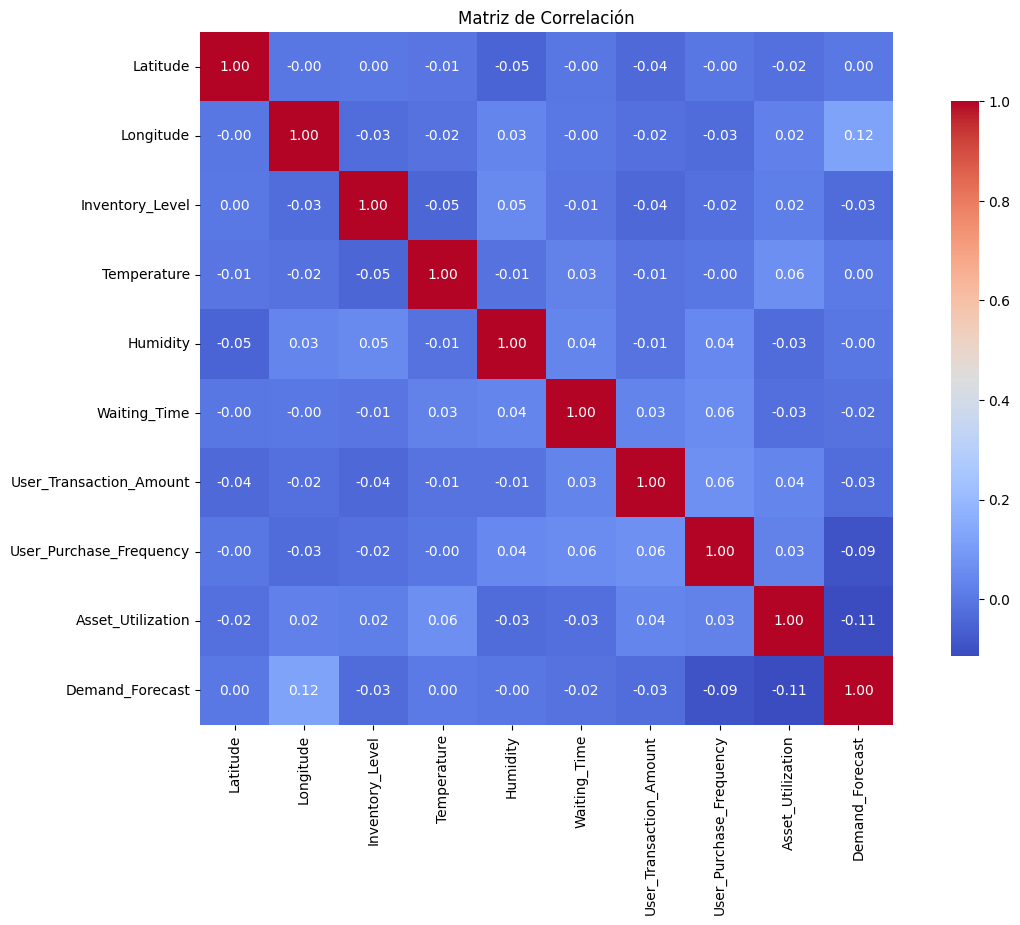

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')


Coeficiente de correlacion: -0.0212



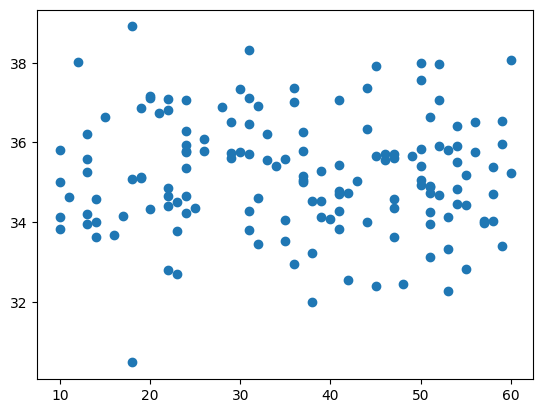

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['Latitude',	'Longitude',	'Inventory_Level',	'Temperature', 'Humidity', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Asset_Utilization', 'Demand_Forecast']]
Y = df["Waiting_Time"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

In [94]:
from statsmodels.formula.api import ols

modelo_2 = ols( formula= 'Waiting_Time ~ Latitude + Longitude + Inventory_Level + Temperature + Humidity + User_Transaction_Amount + User_Purchase_Frequency + Asset_Utilization + Demand_Forecast', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2) #ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
Latitude,0.340250,1.0,0.001642,0.967692
Longitude,2.348536,1.0,0.011331,0.915256
Inventory_Level,1.151585,1.0,0.005556,0.940601
Temperature,140.969097,1.0,0.680150,0.409806
Humidity,156.110361,1.0,0.753204,0.385750
User_Transaction_Amount,149.284976,1.0,0.720272,0.396334
User_Purchase_Frequency,391.509323,1.0,1.888960,0.169743
Asset_Utilization,148.570259,1.0,0.716824,0.397466
Demand_Forecast,35.287876,1.0,0.170257,0.680005
Residual,150679.347183,727.0,NaN,NaN


In [101]:
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9 = modelo_2.params
Fun = lambda X1, X2, X3, X4, X5, X6, X7, X8, X9: b0 + b1 * X1 +  b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7 + b8 * X8 + b9*X9
Fun(15,50,50,50,70,2,0,2,22)

40.41145731755542